# Evaluation of Features

## Single-Context 

In [80]:
dataset = 'youtube'
layer_name = 'LikesLayer' 

In [81]:
import pandas as pd
from pandas import DataFrame

df: DataFrame = pd.read_csv(f'data/{dataset}/ml_input/single_context/{layer_name}.csv', index_col=0)

In [4]:
def remove_empty_community_class(df):
    '''Removes evolution_label -1 from dataset indicating the community stays empty.'''
    import warnings
    warnings.filterwarnings("ignore")
    df['evolution_label'] = df['evolution_label'].replace(-1.0, 0)
    warnings.filterwarnings("default")
    return df

In [83]:
df = remove_empty_community_class(df[df.columns[:-1]]) 

In [84]:
df

,cluster_size,cluster_variance,cluster_density,cluster_import1,cluster_import2,cluster_area,cluster_center_distance,time_f1,time_f2,cluster_size.1,...,cluster_size.2,cluster_variance.2,cluster_density.2,cluster_import1.2,cluster_import2.2,cluster_area.2,cluster_center_distance.2,time_f1.2,time_f2.2,evolution_label
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.239316,0.970942,2.0,...,1.0,0.0,0.0,0.000086,0.000156,0.0,42.714286,0.568065,-0.822984,3.0
1,3.0,0.0,0.0,0.000265,0.000163,0.0,0.000000,0.663123,-0.748511,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.464723,-0.885456,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.464723,0.885456,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.663123,0.748511,0.0
3,1.0,0.0,0.0,0.000086,0.000156,0.0,4.444444,0.354605,-0.935016,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.354605,0.935016,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,-0.568065,0.822984,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,-0.354605,0.935016,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565819,1.0,0.0,0.0,0.000084,0.000166,0.0,0.000000,0.935016,-0.354605,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.822984,-0.568065,0.0
565820,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.992709,-0.120537,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.935016,-0.354605,4.0
565821,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.822984,-0.568065,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.239316,0.970942,0.0
565822,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.992709,0.120537,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.992709,-0.120537,0.0


In [85]:
def get_columns(original_order=True):
    if original_order:
        # the order of names generated by the data_prep script
        names = ['size', 'sd', 'scarcity', 'popularity', 'diversity', 'magnitude', 'temp_center_distance', 'sin_t', 'cos_t']
    else:
        # the order of names in the paper
        names = ['size', 'sd', 'magnitude', 'scarcity', 'temp_center_distance', 'popularity', 'diversity', 'sin_t', 'cos_t']

    columns = []
    for i in range(3):
        columns += [h+f'.{i+1}' for h in names]

    columns += ['evolution_label']
    return columns

In [86]:
df.columns = get_columns()

In [87]:
# match order of paper
df = df[get_columns(original_order=False)]
df

,size.1,sd.1,magnitude.1,scarcity.1,temp_center_distance.1,popularity.1,diversity.1,sin_t.1,cos_t.1,size.2,...,size.3,sd.3,magnitude.3,scarcity.3,temp_center_distance.3,popularity.3,diversity.3,sin_t.3,cos_t.3,evolution_label
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.239316,0.970942,2.0,...,1.0,0.0,0.0,0.0,42.714286,0.000086,0.000156,0.568065,-0.822984,3.0
1,3.0,0.0,0.0,0.0,0.000000,0.000265,0.000163,0.663123,-0.748511,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.464723,-0.885456,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.464723,0.885456,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.663123,0.748511,0.0
3,1.0,0.0,0.0,0.0,4.444444,0.000086,0.000156,0.354605,-0.935016,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.354605,0.935016,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.568065,0.822984,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.354605,0.935016,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565819,1.0,0.0,0.0,0.0,0.000000,0.000084,0.000166,0.935016,-0.354605,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.822984,-0.568065,0.0
565820,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.992709,-0.120537,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.935016,-0.354605,4.0
565821,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.822984,-0.568065,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.239316,0.970942,0.0
565822,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.992709,0.120537,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.992709,-0.120537,0.0


## Cross-Context

In [1]:
dataset = 'youtube'
layer_name = 'TrendDelayLayer' 
reference_layer_name = 'ViewsLayer'

In [2]:
import pandas as pd
from pandas import DataFrame

df: DataFrame = pd.read_csv(f'data/{dataset}/ml_input/cross_context/{layer_name}_{reference_layer_name}.csv', index_col=0)

In [5]:
df = remove_empty_community_class(df[df.columns[:-3]]) 

In [14]:
df

,n_nodes,n_clusters,entropy,sizes_min,sizes_max,sizes_avg,sizes_sum,relative_sizes_min,relative_sizes_max,relative_sizes_avg,...,relative_sizes_avg.1,relative_sizes_sum.1,center_dist_min.1,center_dist_max.1,center_dist_avg.1,center_dist_sum.1,time_f1.1,time_f2.1,cluster_id,evolution_label
0,4318.0,3408.0,11.580360,1.0,12.0,1.267019,4318.0,0.000232,0.002779,0.000293,...,0.000135,1.0,0.0,5.384071e+05,645.961343,4.769133e+06,0.935016,-0.354605,8523.0,0.0
1,9729.0,7371.0,12.688347,1.0,10.0,1.319902,9729.0,0.000103,0.001028,0.000136,...,0.000140,1.0,0.0,2.935547e+06,2033.327409,1.453626e+07,0.885456,0.464723,11834.0,0.0
2,10202.0,7002.0,12.584552,1.0,10.0,1.457012,10202.0,0.000098,0.000980,0.000143,...,0.000144,1.0,0.0,2.372543e+06,1149.232271,7.982567e+06,0.354605,-0.935016,12712.0,0.0
3,8921.0,6981.0,12.632639,1.0,9.0,1.277897,8921.0,0.000112,0.001009,0.000143,...,0.000197,1.0,0.0,3.766089e+05,206.494562,1.045895e+06,0.239316,0.970942,19971.0,0.0
4,9760.0,7095.0,12.603193,1.0,15.0,1.375617,9760.0,0.000102,0.001537,0.000141,...,0.000136,1.0,0.0,2.323384e+06,1283.806296,9.459085e+06,0.748511,0.663123,939.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586027,9162.0,7015.0,12.624013,1.0,9.0,1.306058,9162.0,0.000109,0.000982,0.000143,...,0.000142,1.0,0.0,1.002264e+06,257.336409,1.810876e+06,-0.120537,0.992709,16472.0,0.0
586028,8939.0,6733.0,12.565393,1.0,9.0,1.327640,8939.0,0.000112,0.001007,0.000149,...,0.000145,1.0,0.0,3.759299e+05,249.743865,1.722733e+06,-0.354605,0.935016,1640.0,4.0
586029,9745.0,7290.0,12.678274,1.0,12.0,1.336763,9745.0,0.000103,0.001231,0.000137,...,0.000137,1.0,0.0,3.185698e+06,1957.954065,1.433418e+07,0.992709,0.120537,15165.0,0.0
586030,6476.0,5065.0,12.155163,1.0,9.0,1.278578,6476.0,0.000154,0.001390,0.000197,...,0.000143,1.0,0.0,2.136450e+05,171.292623,1.199562e+06,0.354605,0.935016,7730.0,0.0


In [6]:
def get_columns():
    # the order of names generated by the data_prep script
    # the order of names in the paper
    names = ['size', 'variety', 'entropy']
    for v in ['clst_sizes', 'clst_popularities', 'center_dists']:
        names += [f'{v}_min', f'{v}_max', f'{v}_avg', f'{v}_sum']
    names.extend(['time_f1', 'time_f2'])
    
    columns = []
    for i in range(2):
        columns += [h+f'.{i+1}' for h in names]

    columns += ['cluster_id', 'evolution_label']
    return columns

In [7]:
df.columns = get_columns()

In [20]:
df

,size.1,variety.1,entropy.1,clst_sizes_min.1,clst_sizes_max.1,clst_sizes_avg.1,clst_sizes_sum.1,clst_popularities_min.1,clst_popularities_max.1,clst_popularities_avg.1,...,clst_popularities_avg.2,clst_popularities_sum.2,center_dists_min.2,center_dists_max.2,center_dists_avg.2,center_dists_sum.2,time_f1.2,time_f2.2,cluster_id,evolution_label
0,4318.0,3408.0,11.580360,1.0,12.0,1.267019,4318.0,0.000232,0.002779,0.000293,...,0.000135,1.0,0.0,5.384071e+05,645.961343,4.769133e+06,0.935016,-0.354605,8523.0,0.0
1,9729.0,7371.0,12.688347,1.0,10.0,1.319902,9729.0,0.000103,0.001028,0.000136,...,0.000140,1.0,0.0,2.935547e+06,2033.327409,1.453626e+07,0.885456,0.464723,11834.0,0.0
2,10202.0,7002.0,12.584552,1.0,10.0,1.457012,10202.0,0.000098,0.000980,0.000143,...,0.000144,1.0,0.0,2.372543e+06,1149.232271,7.982567e+06,0.354605,-0.935016,12712.0,0.0
3,8921.0,6981.0,12.632639,1.0,9.0,1.277897,8921.0,0.000112,0.001009,0.000143,...,0.000197,1.0,0.0,3.766089e+05,206.494562,1.045895e+06,0.239316,0.970942,19971.0,0.0
4,9760.0,7095.0,12.603193,1.0,15.0,1.375617,9760.0,0.000102,0.001537,0.000141,...,0.000136,1.0,0.0,2.323384e+06,1283.806296,9.459085e+06,0.748511,0.663123,939.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586027,9162.0,7015.0,12.624013,1.0,9.0,1.306058,9162.0,0.000109,0.000982,0.000143,...,0.000142,1.0,0.0,1.002264e+06,257.336409,1.810876e+06,-0.120537,0.992709,16472.0,0.0
586028,8939.0,6733.0,12.565393,1.0,9.0,1.327640,8939.0,0.000112,0.001007,0.000149,...,0.000145,1.0,0.0,3.759299e+05,249.743865,1.722733e+06,-0.354605,0.935016,1640.0,4.0
586029,9745.0,7290.0,12.678274,1.0,12.0,1.336763,9745.0,0.000103,0.001231,0.000137,...,0.000137,1.0,0.0,3.185698e+06,1957.954065,1.433418e+07,0.992709,0.120537,15165.0,0.0
586030,6476.0,5065.0,12.155163,1.0,9.0,1.278578,6476.0,0.000154,0.001390,0.000197,...,0.000143,1.0,0.0,2.136450e+05,171.292623,1.199562e+06,0.354605,0.935016,7730.0,0.0


## Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)[:,:-1] # all except y

/usr/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/itec/alercher/community-prediction/venv-gpu2/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/usr/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /fastlocal/home/itec/alercher/community-prediction/venv-gpu2/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [9]:
y = df[df.columns[-1]]

In [90]:
pd.DataFrame(data=X, columns=df.columns[:-1])

,size.1,sd.1,magnitude.1,scarcity.1,temp_center_distance.1,popularity.1,diversity.1,sin_t.1,cos_t.1,size.2,...,cos_t.2,size.3,sd.3,magnitude.3,scarcity.3,temp_center_distance.3,popularity.3,diversity.3,sin_t.3,cos_t.3
0,-0.259410,-0.007299,-0.007042,-0.007453,-0.01599,-0.263578,-0.611022,-0.336918,1.060727,0.707975,...,-1.310443,0.220036,-0.007297,-0.007041,-0.00745,0.169599,0.190889,1.323063,0.128416,-1.413263
1,1.199469,-0.007299,-0.007042,-0.007453,-0.01599,1.148758,1.401944,0.488570,-1.310800,0.224821,...,-1.413461,-0.254184,-0.007297,-0.007041,-0.00745,-0.016184,-0.258964,-0.613099,-0.109927,-1.500445
2,-0.259410,-0.007299,-0.007042,-0.007453,-0.01599,-0.263578,-0.611022,0.102129,0.942822,-0.258334,...,0.863400,-0.254184,-0.007297,-0.007041,-0.00745,-0.016184,-0.258964,-0.613099,0.347654,0.779815
3,0.226883,-0.007299,-0.007042,-0.007453,0.00332,0.195752,1.314669,-0.112358,-1.568035,-0.258334,...,-1.618131,-0.254184,-0.007297,-0.007041,-0.00745,-0.016184,-0.258964,-0.613099,-0.363899,1.040091
4,-0.259410,-0.007299,-0.007042,-0.007453,-0.01599,-0.263578,-0.611022,-1.909526,0.856659,-0.258334,...,0.949818,-0.254184,-0.007297,-0.007041,-0.00745,-0.016184,-0.258964,-0.613099,-1.999591,1.040091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565819,0.226883,-0.007299,-0.007042,-0.007453,-0.01599,0.184243,1.433271,1.018162,-0.767512,-0.258334,...,-0.917880,-0.254184,-0.007297,-0.007041,-0.00745,-0.016184,-0.258964,-0.613099,0.716351,-1.057514
565820,-0.259410,-0.007299,-0.007042,-0.007453,-0.01599,-0.263578,-0.611022,1.130535,-0.444677,-0.258334,...,-0.606075,-0.254184,-0.007297,-0.007041,-0.00745,-0.016184,-0.258964,-0.613099,0.974738,-0.759623
565821,-0.259410,-0.007299,-0.007042,-0.007453,-0.01599,-0.263578,-0.611022,0.799946,-1.061923,-0.258334,...,-1.192326,-0.254184,-0.007297,-0.007041,-0.00745,-0.016184,-0.258964,-0.613099,-0.629797,1.090226
565822,-0.259410,-0.007299,-0.007042,-0.007453,-0.01599,-0.263578,-0.611022,1.130535,-0.112180,0.224821,...,-0.275030,-0.254184,-0.007297,-0.007041,-0.00745,-0.016184,-0.258964,-0.613099,1.107798,-0.432972


In [91]:
y.value_counts()

0.0    338613
4.0     93192
3.0     92757
1.0     20679
2.0     20583
Name: evolution_label, dtype: int64

## Principal Components

In [10]:
from sklearn.decomposition import PCA

n_components = 10

pca = PCA(n_components=n_components)
# compute scores in Xp
Xp = pca.fit_transform(X)
# get loadings and the amount of variance explained by each component 
c, v, r = pca.components_, pca.explained_variance_, pca.explained_variance_ratio_

loadings = pd.DataFrame(data=c, columns=df.columns[:-1], index=range(n_components))

In [93]:
pd.DataFrame(data=Xp, columns=[f'Z{i+1}' for i in range(n_components)])

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10
0,0.804271,0.274535,-0.779498,0.024110,0.260775,-0.181421,-0.984131,-1.667364,-0.845527,-0.089896
1,1.171981,0.125292,-1.852597,-0.046000,0.007957,-1.684870,-1.040566,1.745212,-0.824123,-0.047232
2,-0.867403,-0.074934,0.654420,0.000913,0.000673,1.399138,0.843452,0.068743,-0.023922,0.062133
3,-0.237382,0.011986,-0.290840,-0.044208,-0.008782,-1.774646,-0.144105,1.495210,0.552525,0.009976
4,-0.851330,-0.365186,3.640225,-0.015577,0.000857,-0.872920,0.883665,0.031913,-0.023101,0.055386
...,...,...,...,...,...,...,...,...,...,...
565819,-0.233592,0.193412,-2.185342,-0.026850,-0.011376,-0.268257,-0.236846,1.586884,0.575692,0.010207
565820,-0.887670,0.198610,-2.076599,0.007949,0.001155,0.386106,0.867176,0.049979,-0.022408,0.042142
565821,-0.882590,0.068717,-0.757971,-0.004692,0.002476,-0.849460,0.886256,0.033873,-0.019263,0.032450
565822,-0.229181,0.157668,-1.803643,0.010333,0.027590,0.874415,-0.217468,-0.309996,-1.676212,-0.036135


In [94]:
loadings

,size.1,sd.1,magnitude.1,scarcity.1,temp_center_distance.1,popularity.1,diversity.1,sin_t.1,cos_t.1,size.2,...,cos_t.2,size.3,sd.3,magnitude.3,scarcity.3,temp_center_distance.3,popularity.3,diversity.3,sin_t.3,cos_t.3
0,0.393729,0.008284,0.008069,0.008295,0.008208,0.396586,0.140288,-0.003003,0.004051,0.396144,...,0.003211,0.393288,0.009952,0.010120,0.009255,0.006878,0.397085,0.139039,-0.001835,0.002384
1,-0.012943,0.269209,0.261956,0.272162,0.241974,-0.013192,-0.002244,0.046347,-0.032224,-0.011871,...,-0.038823,-0.014100,0.300861,0.306262,0.291054,0.177921,-0.014104,-0.003045,0.038157,-0.040685
2,-0.003656,0.025603,0.024888,0.026055,0.021295,-0.005204,-0.001868,-0.476989,0.321081,-0.002835,...,0.376160,-0.001311,0.031830,0.032398,0.030994,0.015841,-0.005113,-0.001672,-0.396385,0.395065
3,-0.008696,-0.357302,-0.361534,-0.347308,-0.198682,-0.008497,-0.012491,0.001117,0.002011,0.000260,...,-0.000395,0.007367,0.414641,0.406383,0.405461,0.189810,0.007164,0.012266,0.003406,-0.002507
4,-0.003403,-0.352127,-0.346543,-0.336442,0.058228,-0.003323,-0.004660,-0.000218,0.000063,0.005732,...,-0.000689,-0.003315,-0.188518,-0.176459,-0.199887,-0.049595,-0.003263,-0.004689,-0.000383,0.000281
5,-0.006448,0.002726,0.003222,0.003599,-0.008216,-0.006460,-0.018750,0.169939,0.556605,0.005118,...,0.461671,0.013071,-0.000003,0.000409,0.000033,-0.000656,0.001797,-0.002219,0.519958,0.234274
6,0.088154,0.005967,0.006828,0.005200,-0.031287,0.076113,-0.583605,-0.002976,-0.009865,0.101199,...,-0.009772,0.124639,0.012644,0.013684,0.010388,-0.036546,0.114040,-0.521355,-0.009585,-0.006481
7,0.280105,-0.014650,-0.015299,-0.014252,0.038516,0.290463,0.626634,0.003859,0.010037,-0.048899,...,0.006721,-0.216889,0.021961,0.022048,0.021925,-0.066332,-0.223190,-0.556295,0.007656,0.005529
8,0.092980,-0.003668,-0.003321,-0.004779,0.009773,0.099314,0.248465,0.000549,-0.002406,-0.281244,...,-0.000102,0.181192,-0.003833,-0.004125,-0.003070,0.034766,0.192423,0.471036,0.000628,0.001171
9,0.016365,-0.058114,-0.068020,-0.053689,0.392702,0.015570,-0.020194,-0.000926,0.008170,0.005485,...,0.005383,-0.000523,-0.174892,-0.189221,-0.149220,0.612586,-0.001844,-0.057980,0.002611,0.001602


Effect of Variables on each Component:

/home/itec/alercher/community-prediction/venv-gpu2/lib/python3.6/site-packages/ipykernel/pylab/config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


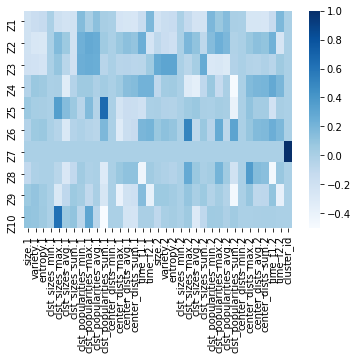

In [11]:
import seaborn as sns
ax = sns.heatmap(loadings, cmap='Blues',
            yticklabels=["Z"+str(x) for x in range(1,len(c)+1)],
            xticklabels=list(df.columns[:-1]))

In [14]:
# loadings[0:1].apply(lambda col: abs(col)>.2).sum()

threshold = .2

components = {}

for i in range(len(loadings)):
    components[i+1] = loadings[i:i+1].apply(lambda row: row[abs(row)>=threshold].index, axis=1).values[0].tolist()
    print(f"{i+1}: {components[i+1]}")

# components


1: ['size.1', 'clst_sizes_avg.1', 'clst_sizes_sum.1', 'center_dists_max.1', 'center_dists_avg.1', 'center_dists_sum.1', 'size.2', 'clst_sizes_avg.2', 'clst_sizes_sum.2', 'center_dists_max.2', 'center_dists_avg.2', 'center_dists_sum.2']
2: ['size.1', 'variety.1', 'entropy.1', 'clst_sizes_sum.1', 'clst_popularities_min.1', 'clst_popularities_max.1', 'clst_popularities_avg.1', 'time_f1.1', 'time_f2.1', 'clst_popularities_max.2', 'time_f1.2', 'time_f2.2']
3: ['size.1', 'variety.1', 'entropy.1', 'clst_sizes_sum.1', 'clst_popularities_min.1', 'clst_popularities_max.1', 'clst_popularities_avg.1', 'size.2', 'variety.2', 'entropy.2', 'clst_sizes_sum.2', 'clst_popularities_min.2', 'clst_popularities_max.2', 'clst_popularities_avg.2']
4: ['clst_sizes_avg.1', 'time_f1.1', 'time_f2.1', 'clst_sizes_max.2', 'clst_sizes_avg.2', 'clst_popularities_sum.2', 'center_dists_sum.2', 'time_f1.2']
5: ['clst_sizes_max.1', 'clst_popularities_sum.1', 'center_dists_max.1', 'clst_popularities_sum.2', 'time_f1.2']
6

In [16]:
components

{1: ['size.1',
  'clst_sizes_avg.1',
  'clst_sizes_sum.1',
  'center_dists_max.1',
  'center_dists_avg.1',
  'center_dists_sum.1',
  'size.2',
  'clst_sizes_avg.2',
  'clst_sizes_sum.2',
  'center_dists_max.2',
  'center_dists_avg.2',
  'center_dists_sum.2'],
 2: ['size.1',
  'variety.1',
  'entropy.1',
  'clst_sizes_sum.1',
  'clst_popularities_min.1',
  'clst_popularities_max.1',
  'clst_popularities_avg.1',
  'time_f1.1',
  'time_f2.1',
  'clst_popularities_max.2',
  'time_f1.2',
  'time_f2.2'],
 3: ['size.1',
  'variety.1',
  'entropy.1',
  'clst_sizes_sum.1',
  'clst_popularities_min.1',
  'clst_popularities_max.1',
  'clst_popularities_avg.1',
  'size.2',
  'variety.2',
  'entropy.2',
  'clst_sizes_sum.2',
  'clst_popularities_min.2',
  'clst_popularities_max.2',
  'clst_popularities_avg.2'],
 4: ['clst_sizes_avg.1',
  'time_f1.1',
  'time_f2.1',
  'clst_sizes_max.2',
  'clst_sizes_avg.2',
  'clst_popularities_sum.2',
  'center_dists_sum.2',
  'time_f1.2'],
 5: ['clst_sizes_max.1

In [15]:
# all metrics
" ".join(loadings.columns.tolist())


'size.1 variety.1 entropy.1 clst_sizes_min.1 clst_sizes_max.1 clst_sizes_avg.1 clst_sizes_sum.1 clst_popularities_min.1 clst_popularities_max.1 clst_popularities_avg.1 clst_popularities_sum.1 center_dists_min.1 center_dists_max.1 center_dists_avg.1 center_dists_sum.1 time_f1.1 time_f2.1 size.2 variety.2 entropy.2 clst_sizes_min.2 clst_sizes_max.2 clst_sizes_avg.2 clst_sizes_sum.2 clst_popularities_min.2 clst_popularities_max.2 clst_popularities_avg.2 clst_popularities_sum.2 center_dists_min.2 center_dists_max.2 center_dists_avg.2 center_dists_sum.2 time_f1.2 time_f2.2 cluster_id'

In [102]:
set(loadings.columns).difference(set(components[1]+components[2]+components[3]))

{'cos_t.1',
 'cos_t.2',
 'cos_t.3',
 'diversity.1',
 'diversity.2',
 'diversity.3',
 'magnitude.1',
 'magnitude.2',
 'magnitude.3',
 'popularity.1',
 'popularity.2',
 'popularity.3',
 'scarcity.1',
 'scarcity.2',
 'scarcity.3',
 'sd.1',
 'sd.2',
 'sd.3',
 'sin_t.1',
 'sin_t.2',
 'sin_t.3',
 'size.1',
 'size.2',
 'size.3',
 'temp_center_distance.1',
 'temp_center_distance.2',
 'temp_center_distance.3'}

Variance explained by Components:

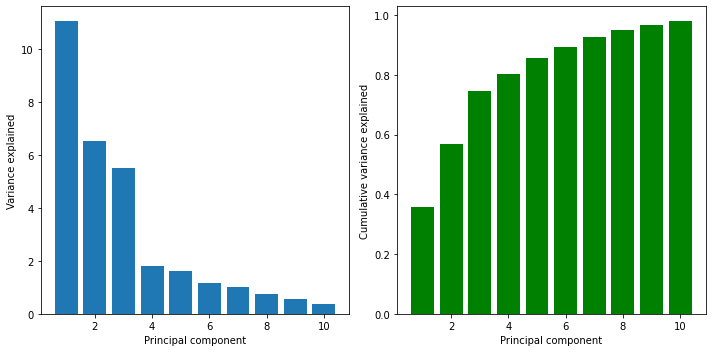

In [38]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True)
ax[0].bar(range(1,len(v)+1),v)
ax[0].set_ylabel('Variance explained')
ax[1].set_ylabel('Cumulative variance explained')
ax[0].set_xlabel('Principal component')
ax[1].set_xlabel('Principal component')
ax[1].bar(range(1,len(r)+1), np.cumsum(r), color='green')
fig.tight_layout()

Loadings to Components:


In [39]:
def biplot(z1, z2, sc, comps, obs, features, colors, title):
    x, y = sc[:,z1], sc[:,z2]
    
    fig = plt.figure(figsize=(10,10))
    plt.xlabel("Z{}".format(z1))
    plt.ylabel("Z{}".format(z2))

    sx = (x.max() - x.min())/2
    sy = (y.max() - y.min())/2

    # print X and y label
    y_colors = ['red', 'orange', 'green', 'magenta', 'blue']
    plt.scatter(x, y, c=[y_colors[int(e)] for e in obs])
    # for i in range(len(obs)):
    #     plt.text(x[i], y[i], obs[i], ha='center', fontsize=12)

    vec = np.transpose(comps[[z1,z2], :])
    
    for i in range(len(vec)):
        plt.arrow(0, 0, vec[i,0]*sx, vec[i,1]*sy, ec=colors[i],
                  head_width=0.1, head_length=0.1, fc=colors[i])
        plt.text(vec[i,0]*sx*1.2, vec[i,1]*sy*1.2, features[i], 
                 color = colors[i])

    plt.title(title)
    plt.grid()

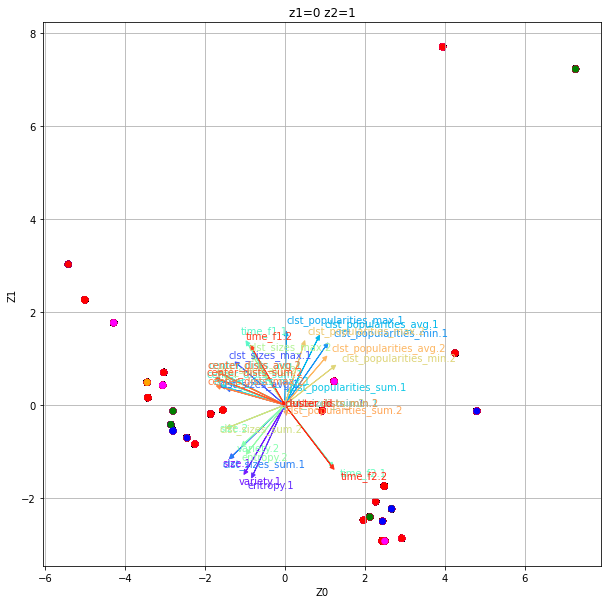

In [40]:
import itertools

feature_colors = plt.cm.rainbow(np.linspace(0, 1, len(df.columns)))
for z1, z2 in itertools.combinations(range(n_components), 2):
    biplot(z1, z2, Xp, c, y, df.columns, colors=feature_colors, title=f"z1={z1} z2={z2}")
    break